<p style="text-align: center">
<h1>
Data Visualizations
</h1>
Discovering as much as I can regarding the data set
</p>

<br>
<img src="C1Banner.png"/>



In [139]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [140]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

In [141]:
df_paths = ['Data/pickles/clean_data/{}'.format(file) for file in os.listdir('Data/pickles/clean_data')]

df = pd.concat([
    pd.read_pickle(df_paths[0]),
    pd.read_pickle(df_paths[1])],
axis=1)

# Numerical Data
## General Idea of Numeric Data Distribution

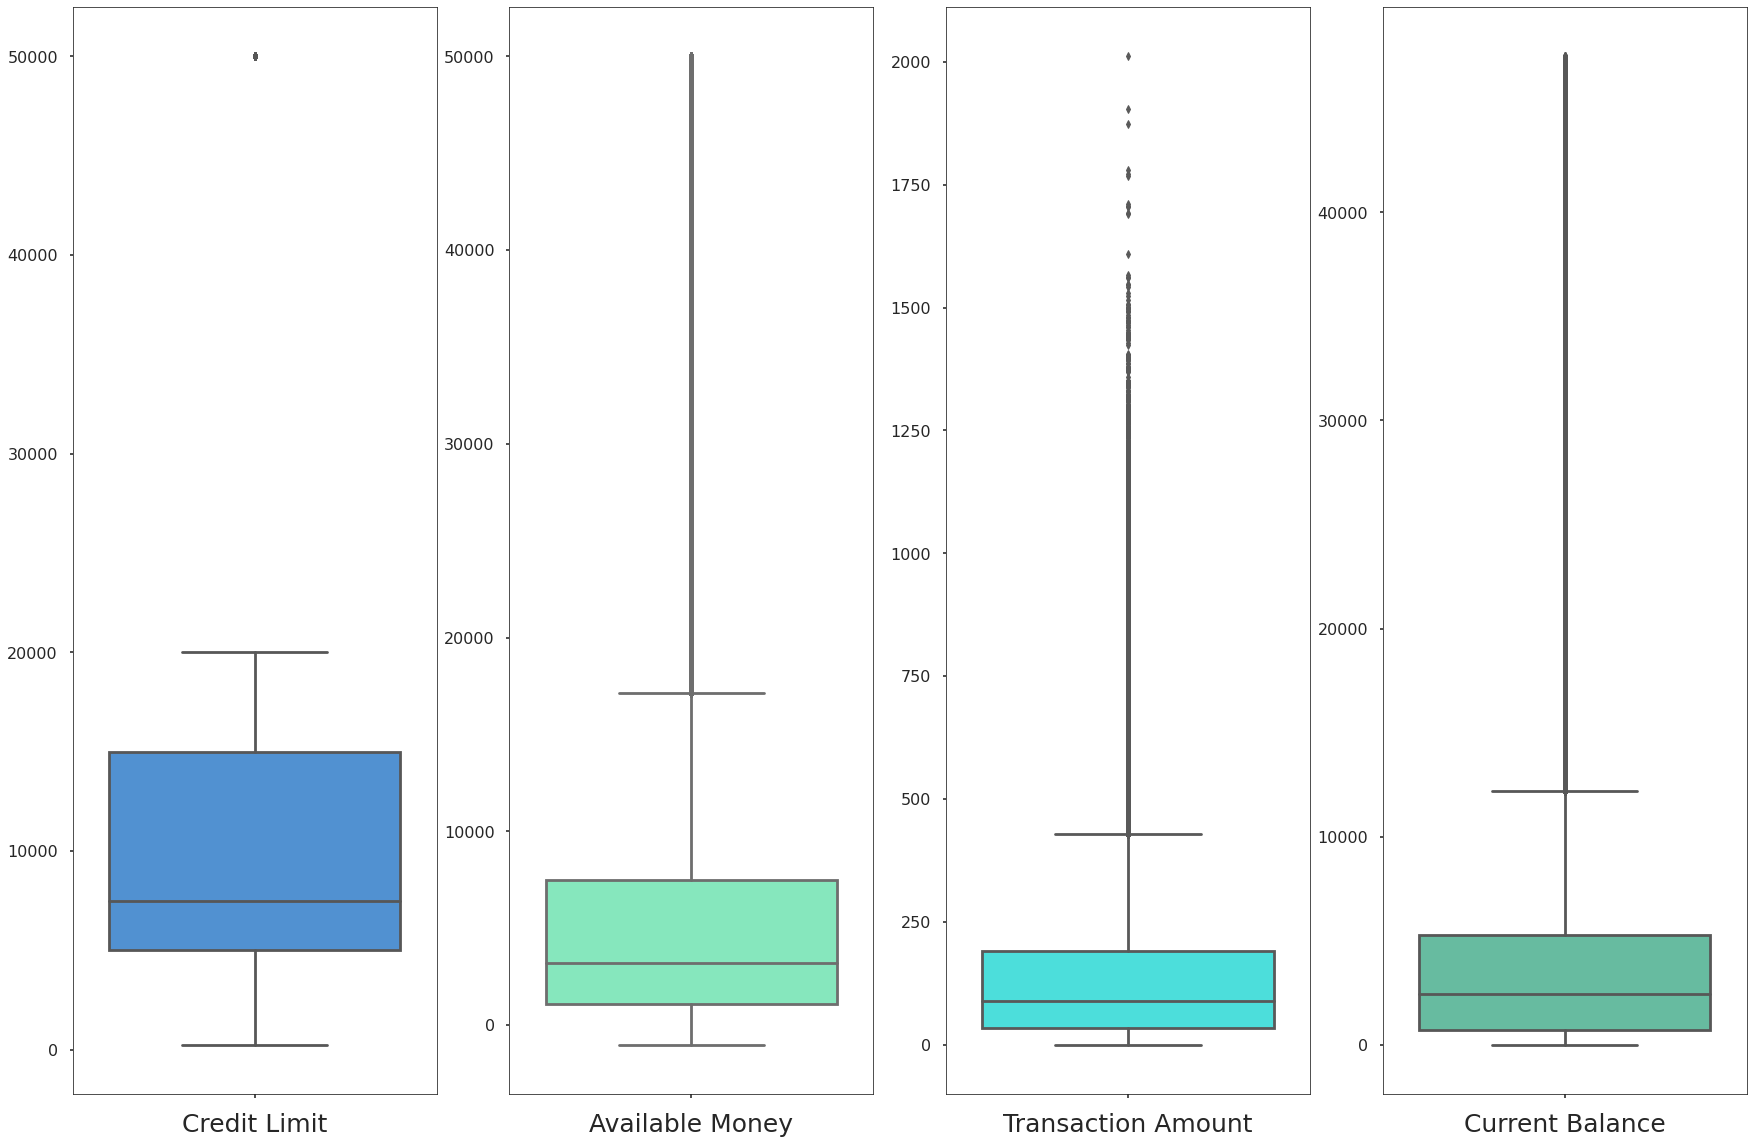

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,20))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']

for i in range(len(numeric_cols)):
    sns.boxplot(data=df, x=numeric_cols[i], ax=ax[i], color=colors[i], orient='v')
    ax[i].set_xlabel(neat_cols[i], fontsize=25)
    ax[i].set_ylabel('')

### Credit Limit
Some really far outliers at credit limit of 50,000
Also does not seem to have a normal distribution
### Available Money
Appears to be right skewed
Interesting to see that available money is so low, I would've expected the general savings to be higher
More outliers as money increases, which makes sense
### Transaction Amount
Right skewed
Seems that the general transaction amount is typically low, which makes sense
Surprised to see that the maximum transaction amount in this data set is ~2000 -- I expected some larger numbers
### Current Balance
Right skewed
Really interesting again that the usual balance for a bank customer is so low.

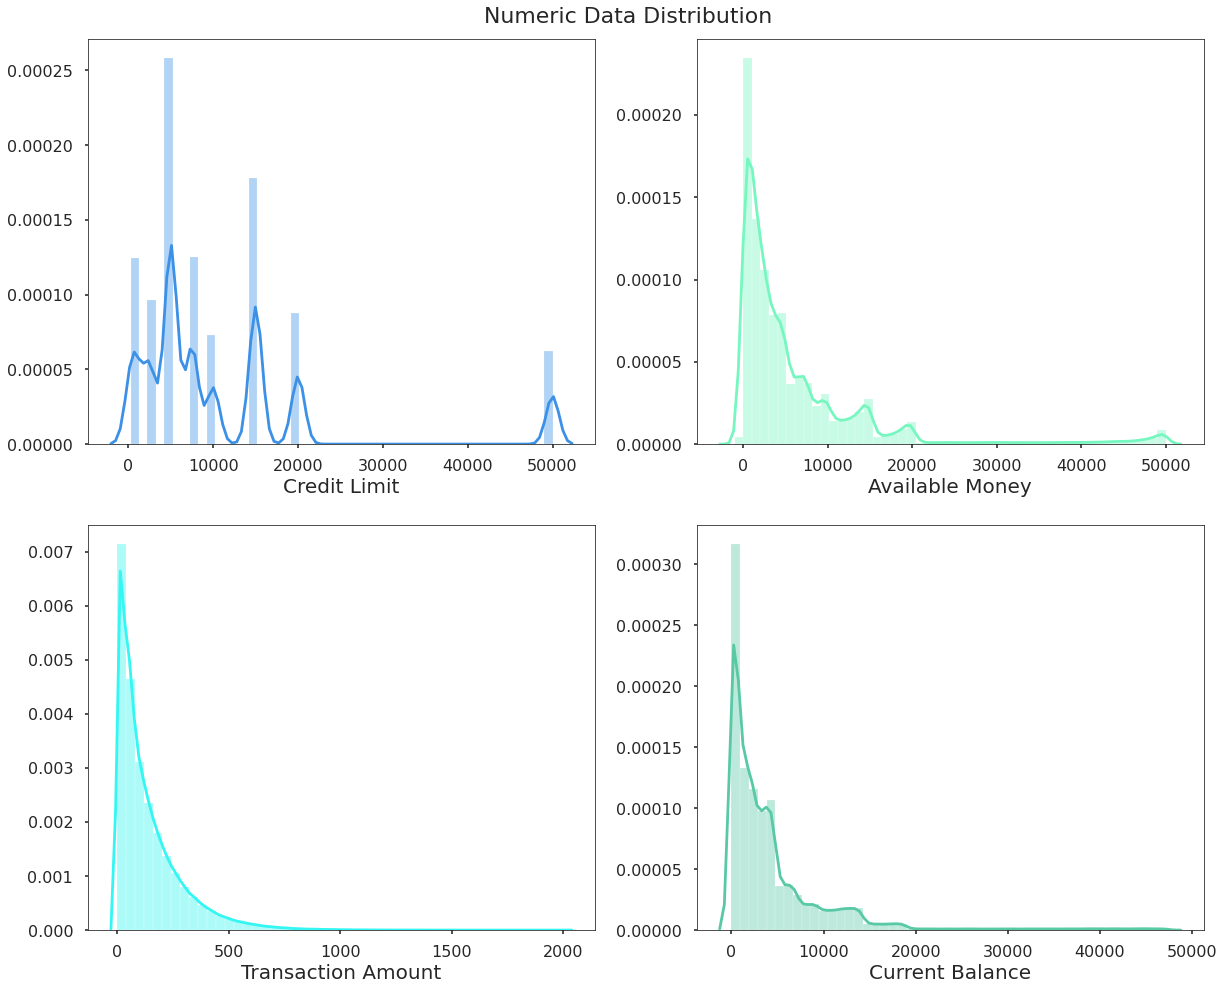

In [143]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']
counter = 0

for i in range(2):
    for j in range(2):
        sns.distplot(df[numeric_cols[counter]], ax=ax[i][j], color=colors[counter])
        ax[i][j].set_xlabel(neat_cols[counter], fontsize=20)
        ax[i][j].set_ylabel('')
        counter+=1

fig.suptitle('Numeric Data Distribution', fontsize=22)
fig.subplots_adjust(top=0.95)

### Credit Limit
The data is messier than initially expected. The distribution is multimodal and a simple transformation will not work.
Ideally if I decide to use this feature, an easy solution would be to use a model that doesn't assume gaussian.

Makes sense that the distribution is multimodal since it seems like these limit values are predetermined are not random
### Available Money
Extremely right skewed
Seems like an important feature that would probably correlate with many features within in the data set, and a simple boxcox transformation can easily normalize this distribution. I can also remove the outliers at 50000 as well -- if needed.
### Transaction Amount
Right skewed
Behavior of the distribution is really satisfying.
Not much else to mention
### Current Balance
Right skewed
Really interesting again that the usual balance for a bank customer is so low.

# Categorical Data

## isFraud
This is an interesting feature that is conveniently formatted in a way that makes it a good target label.
While this is only data exploration, I am interested in comparing it to other features to see some differences or similiarities.

Text(0, 0.5, 'Count')

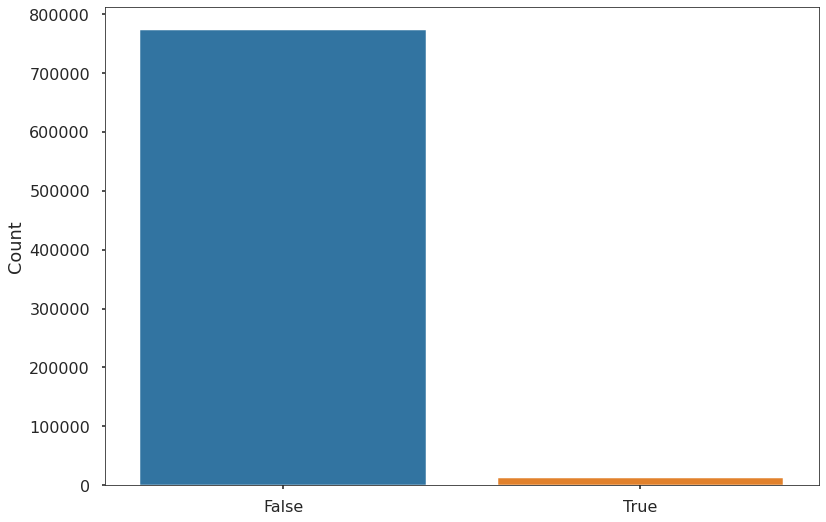

In [144]:
fraud_vals = df['isFraud'].value_counts()

sns.barplot(x=[0,1], y=fraud_vals)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.ylabel('Count')

Unfortunate, as the classes are extremely unbalanced. A technique would such as under-sampling would help even out the classes.
Although it is good that C1 has minimal fraudulent transactions

Text(0.5, 1.0, 'Comparing Transactions between Fraud and Authentic')

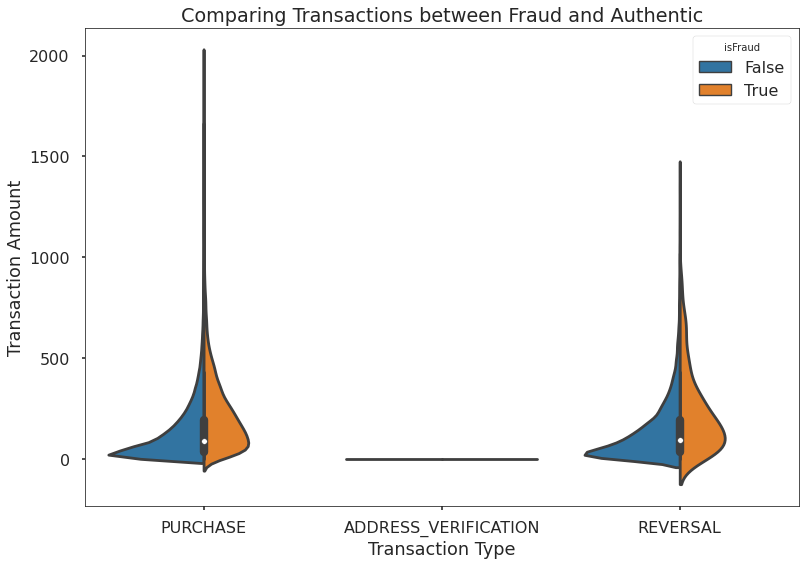

In [145]:
sns.violinplot(data=df, y='transactionAmount', x='transactionType', hue='isFraud', split=True)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Comparing Transactions between Fraud and Authentic')

Interesting that fraudulent transactions are typically larger in the amount of money they contain. This does make sense though since the people committing fraudulent transactions are most likely not buying _Tic-Tacs_.

I also find it interesting that fraudulent transactions are more common in Reversal Transactions. It seems as if it is possible that TRF is a more popular technique for committing fraud.